In [1]:
# input file
import pickle
import numpy as np
import matplotlib.pyplot as plt

pickle_in = open("../Preprosesing-data/x_y.pickle","rb")
X = pickle.load(pickle_in)

In [2]:
# trying open first data
X[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

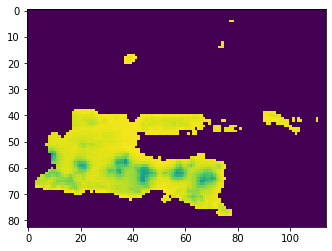

In [3]:
plt.imshow(X[0])

In [4]:
np.array(X).shape

(408, 83, 114)

In [5]:
X_train = X[:-12]
X_predict = X[-12:]
X_test = X[-12:]

In [6]:
# adjust input from 3D (1D longitude, 1D latitude, 1D time) to 5D
X_train = np.array(X_train).reshape(-1,12,83,114,1)
# X_test = np.array(X_test).reshape(-1,12,83,114,1)

In [7]:
X_train.shape

(33, 12, 83, 114, 1)

In [8]:
X_train[0]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [13]:
# model ConvLSTM
seq = Sequential()

seq.add(ConvLSTM2D(filters=128, kernel_size=(3, 3),
                   input_shape=(None,83,114,1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=128, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=128, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=128, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3,3),
               activation='relu',
               padding='same', data_format='channels_last'))
seq.compile(loss='mae', optimizer='adam')

In [11]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15247638276955725914
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6667798446
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9593830829492068480
physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


In [14]:
seq.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_5 (ConvLSTM2D)  (None, None, 83, 114, 128 594944    
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 83, 114, 128 512       
_________________________________________________________________
conv_lst_m2d_6 (ConvLSTM2D)  (None, None, 83, 114, 128 1180160   
_________________________________________________________________
batch_normalization_6 (Batch (None, None, 83, 114, 128 512       
_________________________________________________________________
conv_lst_m2d_7 (ConvLSTM2D)  (None, None, 83, 114, 128 1180160   
_________________________________________________________________
batch_normalization_7 (Batch (None, None, 83, 114, 128 512       
_________________________________________________________________
conv_lst_m2d_8 (ConvLSTM2D)  (None, None, 83, 114, 128

In [15]:
seq.fit(X_train, X_train, batch_size=6,epochs=3, validation_split=0.05)

Train on 31 samples, validate on 2 samples
Epoch 1/3


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv_lst_m2d_5/convolution (defined at c:\users\komputer3\miniconda3\envs\ml1\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_13301]

Function call stack:
keras_scratch_graph


In [54]:
pred_list =[]

# batch = X_train[-12:].reshape((-1, 12, 83,114,1))
batch = np.array(X_predict).reshape(-1,12,83,114,1)

In [55]:
prediksi=seq.predict(batch)

prediksi.shape

(1, 12, 83, 114, 1)

In [56]:
# change dimension
prediksi=np.squeeze(prediksi, axis=(4,))

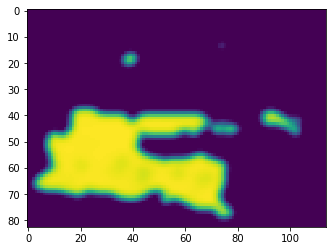

In [57]:
plt.imshow(prediksi[0][0])

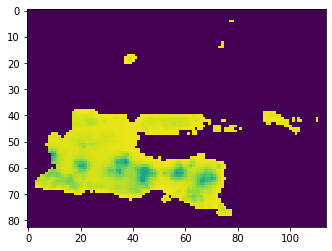

In [58]:
# test=np.squeeze(X_predict[-1:], axis=(4,))
plt.imshow(X_predict[0])

In [31]:
from skimage import io
io.imsave('mon.tif', prediksi[0][0])

ModuleNotFoundError: No module named 'skimage'